In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls

dataset  Progress.ipynb


In [3]:
import os
os.chdir('drive/Shared drives/Team Garuda/BTP CODE + DATASET')

In [11]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
import random
from math import *
from sklearn.ensemble import VotingClassifier
# import gmatch4py as gm

In [12]:
listy=['dataset/email-univ.edges','dataset/bn-mouse_brain_1.edges','dataset/ia-fb-messages.edges','dataset/ia-crime-moreno.edges','dataset/SW-1000-6-0d1-trial2.edges','dataset/bio-DM-HT.edges']
data=[]
for i in range(len(listy)):
    data.append(np.genfromtxt(listy[i],delimiter=' '))


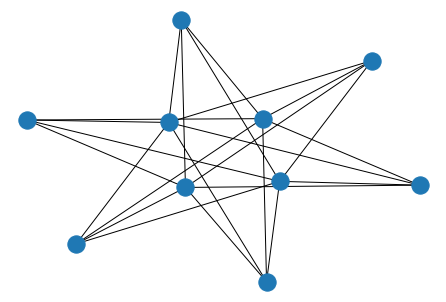

In [14]:
gr1=nx.complete_bipartite_graph(5,4) 
gr2=nx.complete_bipartite_graph(6,4)
nx.draw(gr2)
#ged=gm.GraphEditDistance(1,1,1,1)
# result=ged.compare([gr1,gr2],None) 
# ged.similarity(result)
# ged.distance(result)

In [15]:
G=[]
pos=[]

for data1 in data:
    G1 = nx.Graph()
    for i in range(len(data1)):
        G1.add_edge(data1[i][0],data1[i][1])
    pos1 = nx.spring_layout(G1, scale=3)
    len(pos1)
    pos.append(pos1)
    print(G1.number_of_nodes())
    G.append(G1)

1133
213
1266
829
1000
2989


3

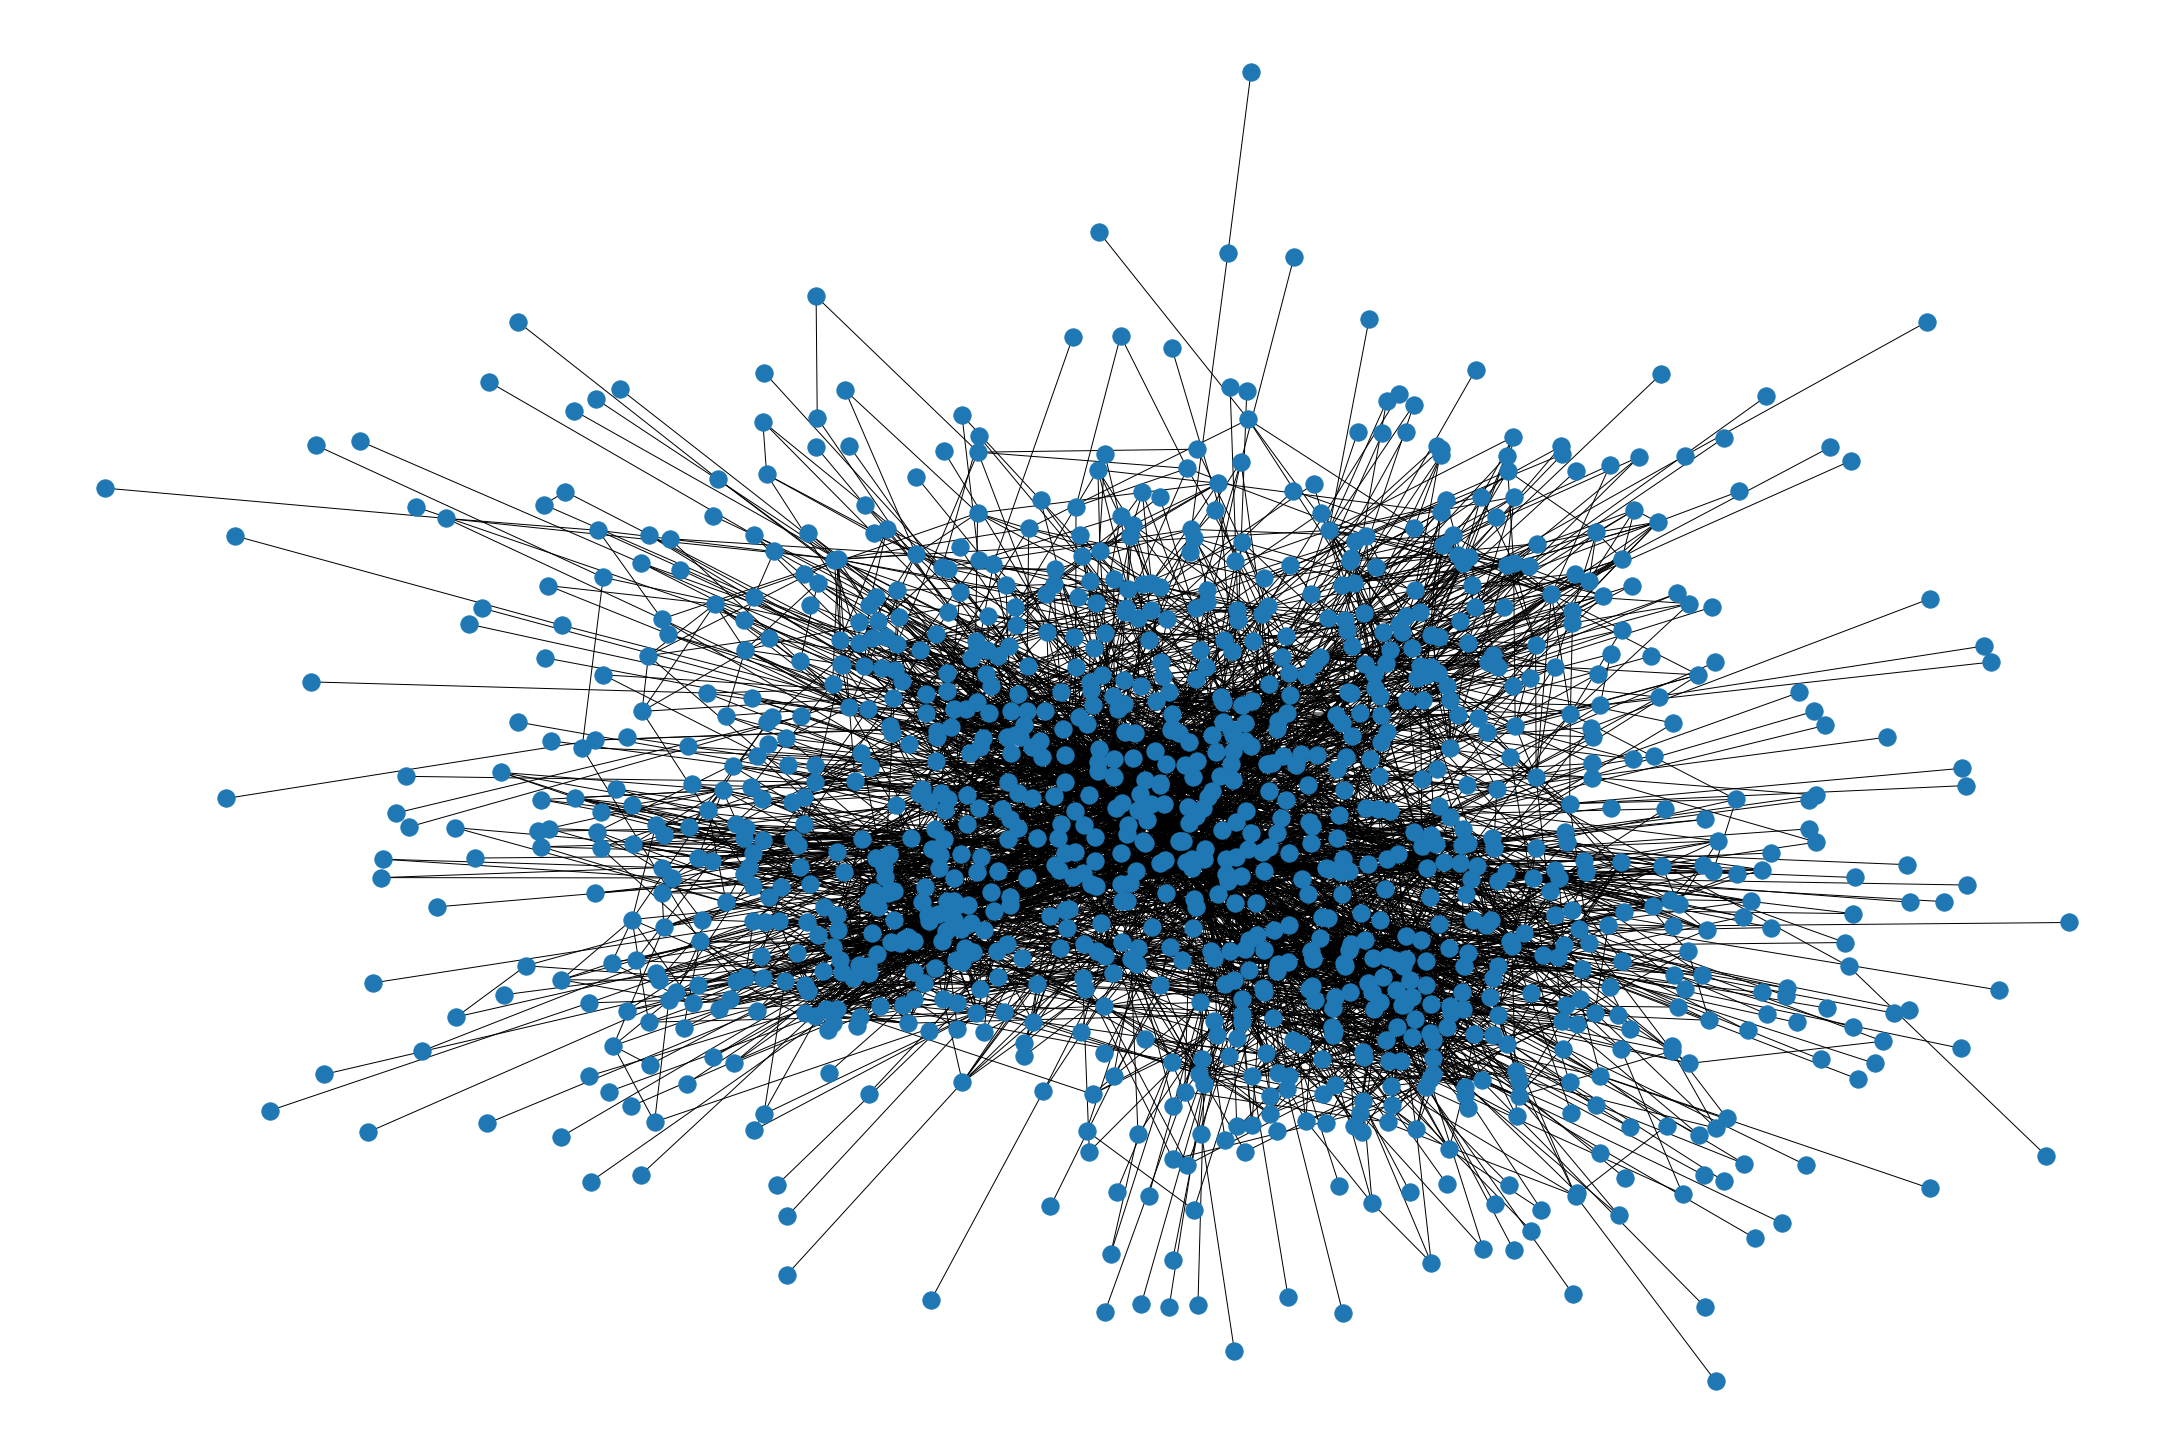

In [16]:
po=0
plt.axes([4, 4, 5, 5])
nx.draw(G[po],pos[po],node_size=300)
G[po].size('weight')

# for i in G[0]:
#     print(i)
len(G1[1])
# if 1 in G1.adj[0]:


In [17]:
random.seed(1000)
probe_edge_set=[]
def prob(idx):
    probe_size = int(0.3*(G[idx].number_of_edges()))
    probe_edge_set.append(random.sample(list(G[idx].edges()),probe_size))

    Training = nx.Graph(G[idx], name="Training Links")
    for i in probe_edge_set[-1]:
        Training.remove_edge(i[0],i[1])
    print(nx.info(G[idx]), "\n")
    print(nx.info(Training), "\n")
    print("Probe Edge Set\nNumber of edges:", len(probe_edge_set[-1]))
    print("====================================================")
    return Training
training=[]
for i in range(len(G)):
    training.append(prob(i))


Name: 
Type: Graph
Number of nodes: 1133
Number of edges: 5451
Average degree:   9.6222 

Name: Training Links
Type: Graph
Number of nodes: 1133
Number of edges: 3816
Average degree:   6.7361 

Probe Edge Set
Number of edges: 1635
Name: 
Type: Graph
Number of nodes: 213
Number of edges: 16242
Average degree: 152.5070 

Name: Training Links
Type: Graph
Number of nodes: 213
Number of edges: 11370
Average degree: 106.7606 

Probe Edge Set
Number of edges: 4872
Name: 
Type: Graph
Number of nodes: 1266
Number of edges: 6451
Average degree:  10.1912 

Name: Training Links
Type: Graph
Number of nodes: 1266
Number of edges: 4516
Average degree:   7.1343 

Probe Edge Set
Number of edges: 1935
Name: 
Type: Graph
Number of nodes: 829
Number of edges: 1475
Average degree:   3.5585 

Name: Training Links
Type: Graph
Number of nodes: 829
Number of edges: 1033
Average degree:   2.4922 

Probe Edge Set
Number of edges: 442
Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 3000
Average degree: 

In [18]:
# ====================================================
# CALCULATING/PLOTTING AUC : AREA UNDER ROC CURVE
# ====================================================
import random
from random import shuffle
def AUC(score_probe,score_non_existent):
    N = min(len(score_probe),len(score_non_existent))
    shuffle(score_probe)
    shuffle(score_non_existent)
    
    n1 = n2 = n3 = 0
    for i in range(N):
        probe_edge = score_probe[i]
        non_ex_edge = score_non_existent[i]
        if probe_edge[2] > non_ex_edge[2]:
            n1 += 1
        elif probe_edge[2] < non_ex_edge[2]:
            n3 += 1
        else:
            n2 += 1

    tp = tn = n1 + n2/2
    fp = fn = N - tp
    
    AUC = 0
    if N > 0:
        AUC = tp / N
    return AUC


def plot(mins,maxs,means,vals,names):
#     fig,(sub,box) = plt.subplots(ncols = 2, figsize = (15,5))
    
    fig = plt.figure(1)
    sub = fig.add_subplot(111)
    fig2 = plt.figure(2)
    box = fig2.add_subplot(111)
    
    tests = len(names)
    iters = 0
    if tests > 0:
        iters = len(vals[0])

#   Line Plot
    for i in range(tests):
        name = names[i]
        l = vals[i]
        sub.plot(range(1,len(l)+1),l,'-o',label=name)
        
    sub.set_title("Area Under ROC Curve")
    sub.set_xlabel('Iteration')
    sub.set_ylabel('AUC')
    sub.set_xticks(np.arange(1, iters+1, 1.0))
    sub.set_yticks(np.arange(0, 1.1, 0.1))

    sub.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#     sub.legend(loc='center left', bbox_to_anchor=(0.5, -0.4))
    sub.axhline(0.5, linestyle='--', color='k')
    sub.yaxis.grid()
#   Box Plot
    box.set_title("Area Under ROC Curve")
    box.set_ylabel('AUC')
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xticks(rotation=90)
    box.axis(ymin=0,ymax=1)
    box.axhline(0.5, linestyle='--', color='k')
    box.yaxis.grid()

    box.errorbar(names, means, fmt='sb', lw=3)
    box.errorbar(names, means, 
                 [np.array(means)-np.array(mins), np.array(maxs)-np.array(means)],
                 fmt='.b', ecolor='blue', lw=1,capsize=3,capthick=3,ms=9,markerfacecolor='none',mew=1)
    plt.show()
    
def plotAUC(metrics,idx,N=100,T=10):
    mins = []
    maxs = []
    means = []
    names = []
    vals = []
    for name,f in metrics.items():
        l = []
        for i in range(T):
            pro = random.sample(probe_edge_set[idx], N)
            score_probe = f(training[idx], pro)
            non_e = random.sample(list(nx.non_edges(G[idx])), N)
            score_non_existent = f(training[idx], non_e)

            l += [AUC(score_probe,score_non_existent)]

        AUCrange = (min(l), max(l), sum(l)/float(len(l)))
        vals.append(l)
        mins.append(AUCrange[0])
        maxs.append(AUCrange[1])
        means.append(AUCrange[2])
        names.append(name)
        print(name,':',AUCrange)

    plot(mins,maxs,means,vals,names)

In [19]:
def _apply_prediction(G, f, ebunch=None):
    if ebunch is None:
        ebunch = nx.non_edges(G)
    return [(u, v, f(u, v)) for u, v in ebunch]

def ensemble(G, ebunch=None):
    def predict(u,v):
        try:
            return -(nx.shortest_path_length(G,source=u,target=v)+nx.shortest_path_length(G,source=u,target=v,weight='value'))/2
        except:
            return -G.number_of_nodes()
    return _apply_prediction(G, predict, ebunch)
        
def graph_distance(G, ebunch=None):
    """Compute the score based on shortest path length (number of nodes in the path).
    """
    def predict(u, v):
        try:
            return -nx.shortest_path_length(G,source=u,target=v)
        except:
            return -G.number_of_nodes()
    return _apply_prediction(G, predict, ebunch)


def path_length(G, ebunch=None):
    """Compute the score based on shortest path length (sum of weights).
    """
    def predict(u, v):
        try:
            return -nx.shortest_path_length(G,source=u,target=v,weight='value')
        except:
            return -G.number_of_nodes()
    return _apply_prediction(G, predict, ebunch)


def common_neighbors(G, ebunch=None):
    """Compute the Common Neighbours of all node pairs in ebunch.
    """
    def predict(u, v):
        return len(list(nx.common_neighbors(G, u, v)))
    return _apply_prediction(G, predict, ebunch)


def jaccard_coefficient(G, ebunch=None):
    """Compute the Jaccard coefficient of all node pairs in ebunch.
    """
    def predict(u, v):
        union_size = len(set(G[u]) | set(G[v]))
        if union_size == 0:
            return 0
        return len(list(nx.common_neighbors(G, u, v))) / union_size
    return _apply_prediction(G, predict, ebunch)
def adamic_adar_index(G, ebunch=None):
    """Compute the Adamic-Adar index of all node pairs in ebunch.
    """
    def predict(u, v):
        return sum(1 / log(G.degree(w)) for w in nx.common_neighbors(G, u, v))
    return _apply_prediction(G, predict, ebunch)


def resource_allocation_index(G, ebunch=None):
    """Compute the resource allocation index of all node pairs in ebunch.
    """
    def predict(u, v):
        return sum(1 / G.degree(w) for w in nx.common_neighbors(G, u, v))
    return _apply_prediction(G, predict, ebunch)


def preferential_attachment(G, ebunch=None):
    """Compute the preferential attachment score of all node pairs in ebunch.
    """
    def predict(u, v):
        return G.degree(u) * G.degree(v)
    return _apply_prediction(G, predict, ebunch)


def clustering_coefficient(G, ebunch=None):
    """Compute the Clustering Coefficient score of all node pairs in ebunch.
    """
    def predict(u, v):
        return nx.clustering(G,u) + nx.clustering(G,v)
    return _apply_prediction(G, predict, ebunch)

def weighted_clustering_coefficient(G, ebunch=None):
    """Compute the Weighted Clustering Coefficient score of all node pairs in ebunch.
    """
    def predict(u, v):
        return nx.clustering(G,u,weight='value') + nx.clustering(G,v,weight='value')
    return _apply_prediction(G, predict, ebunch)

1====================================================1
Graph Distance : (0.805, 0.885, 0.8394999999999999)
Path Length : (0.8, 0.925, 0.8380000000000001)
EnsembledD : (0.805, 0.89, 0.8404999999999999)
Common Neighbors : (0.75, 0.84, 0.7945)
Jaccard Coefficient : (0.725, 0.825, 0.7844999999999999)
Adamic/Adar Index : (0.705, 0.845, 0.7785000000000001)
Resource Allocation Index : (0.73, 0.825, 0.7745000000000001)
Preferential Attachment : (0.665, 0.815, 0.7514999999999998)
Clustering Coefficient : (0.47, 0.6, 0.534)
Weighted Clustering Coefficient : (0.45, 0.65, 0.5505)


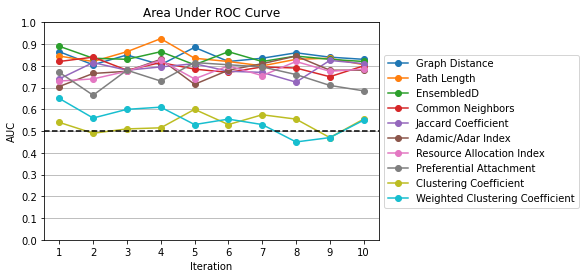

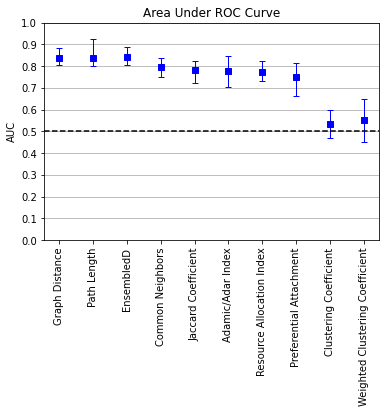

2====================================================2
Graph Distance : (0.5, 0.515, 0.505)
Path Length : (0.5, 0.515, 0.5035000000000001)
EnsembledD : (0.5, 0.52, 0.5050000000000001)
Common Neighbors : (0.695, 0.815, 0.7485)
Jaccard Coefficient : (0.64, 0.79, 0.7175)
Adamic/Adar Index : (0.69, 0.8, 0.743)
Resource Allocation Index : (0.68, 0.78, 0.742)
Preferential Attachment : (0.67, 0.78, 0.7254999999999999)
Clustering Coefficient : (0.27, 0.42, 0.341)
Weighted Clustering Coefficient : (0.3, 0.38, 0.32699999999999996)


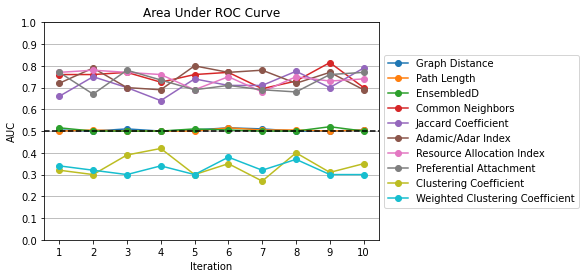

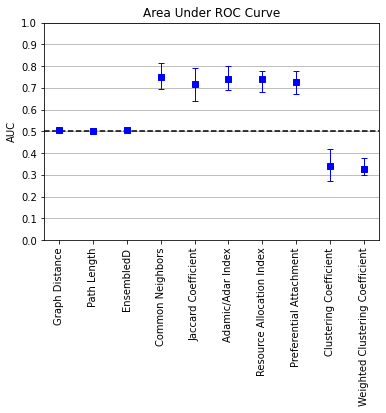

3====================================================3
Graph Distance : (0.69, 0.83, 0.7675000000000002)
Path Length : (0.71, 0.85, 0.7665)
EnsembledD : (0.725, 0.78, 0.7469999999999999)
Common Neighbors : (0.615, 0.695, 0.6460000000000001)
Jaccard Coefficient : (0.575, 0.66, 0.6290000000000001)
Adamic/Adar Index : (0.59, 0.7, 0.6415)
Resource Allocation Index : (0.59, 0.7, 0.6459999999999999)
Preferential Attachment : (0.765, 0.91, 0.8140000000000001)
Clustering Coefficient : (0.555, 0.705, 0.64)
Weighted Clustering Coefficient : (0.535, 0.725, 0.6295)


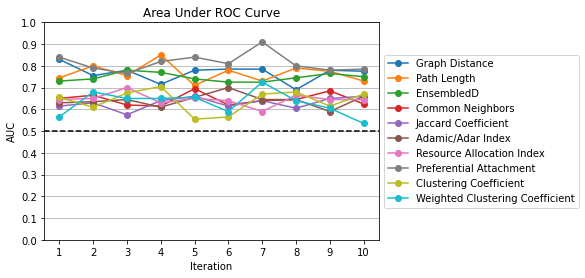

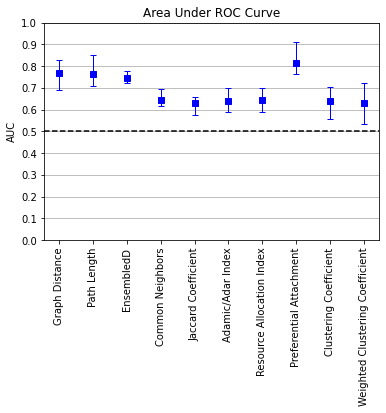

4====================================================4
Graph Distance : (0.48, 0.61, 0.554)
Path Length : (0.465, 0.565, 0.534)
EnsembledD : (0.455, 0.61, 0.5435)
Common Neighbors : (0.495, 0.515, 0.5045)
Jaccard Coefficient : (0.49, 0.505, 0.49850000000000005)
Adamic/Adar Index : (0.49, 0.515, 0.503)
Resource Allocation Index : (0.485, 0.515, 0.503)
Preferential Attachment : (0.54, 0.685, 0.6275)
Clustering Coefficient : (0.495, 0.515, 0.5025)
Weighted Clustering Coefficient : (0.465, 0.515, 0.5045)


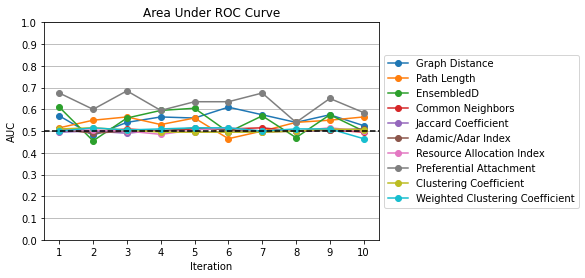

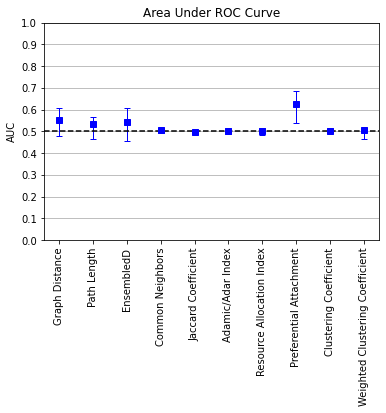

5====================================================5
Graph Distance : (0.91, 0.975, 0.9365)
Path Length : (0.875, 0.965, 0.9254999999999999)
EnsembledD : (0.915, 0.965, 0.9405000000000001)
Common Neighbors : (0.8, 0.865, 0.8400000000000001)
Jaccard Coefficient : (0.805, 0.86, 0.8404999999999999)
Adamic/Adar Index : (0.805, 0.865, 0.8384999999999998)
Resource Allocation Index : (0.805, 0.855, 0.827)
Preferential Attachment : (0.255, 0.34, 0.2895)
Clustering Coefficient : (0.36, 0.55, 0.45100000000000007)
Weighted Clustering Coefficient : (0.41, 0.585, 0.491)


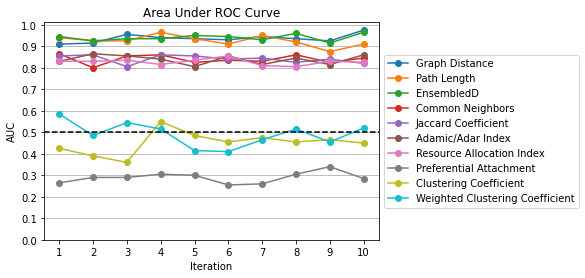

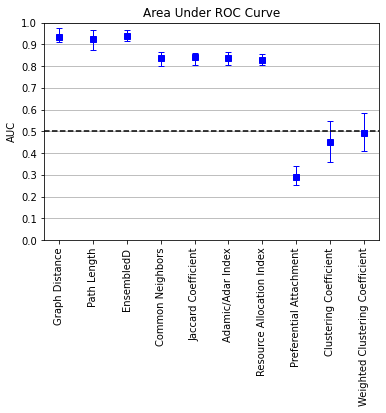

6====================================================6
Graph Distance : (0.585, 0.695, 0.6319999999999999)
Path Length : (0.535, 0.69, 0.6194999999999999)
EnsembledD : (0.58, 0.735, 0.6515)
Common Neighbors : (0.5, 0.525, 0.513)
Jaccard Coefficient : (0.5, 0.53, 0.5135)
Adamic/Adar Index : (0.5, 0.535, 0.5160000000000001)
Resource Allocation Index : (0.51, 0.535, 0.5225000000000001)
Preferential Attachment : (0.495, 0.64, 0.5805)
Clustering Coefficient : (0.495, 0.54, 0.518)
Weighted Clustering Coefficient : (0.49, 0.565, 0.521)


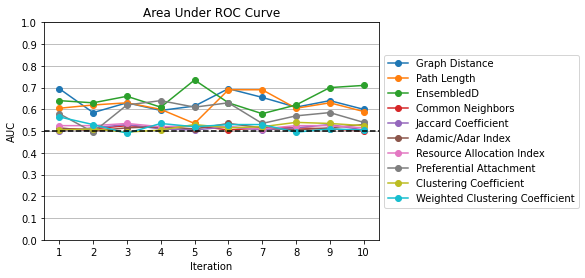

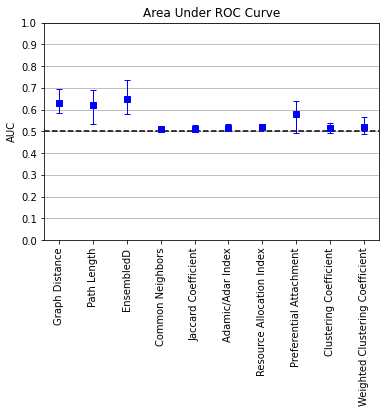

In [20]:
metrics = {
    "Graph Distance" : graph_distance,
    "Path Length" : path_length,
    "EnsembledD" : ensemble,
    "Common Neighbors" : common_neighbors,
    "Jaccard Coefficient" : jaccard_coefficient,
    "Adamic/Adar Index" : adamic_adar_index,
    "Resource Allocation Index" : resource_allocation_index,
    "Preferential Attachment" : preferential_attachment,
    "Clustering Coefficient" : clustering_coefficient,
    "Weighted Clustering Coefficient" : weighted_clustering_coefficient,
}
for i in range(len(G)):
    print(str(i+1)+"===================================================="+str(i+1))
    plotAUC(metrics,i)


# Ensemble

In [21]:
# estimators=[]
# model1=common_neighbors
# model2=adamic_adar_index
# model3=resource_allocation_index
# estimators.append(('CN',model1))
# estimators.append(('AAI',model2))
# estimators.append(('RAI',model3))
# ensemble = VotingClassifier(estimators)
# metrics = {
#     "EnsembleDD" : ensemble,
# }
# plotAUC(metrics,0)

In [22]:
def graph_dis(u, v, Gr):
    try:
        return nx.shortest_path_length(Gr,source=u,target=v)
    except:
        return Gr.number_of_nodes()
        
def path_len(u,v,Gr):
    try:
        return nx.shortest_path_length(Gr,source=u,target=v,weight='value')
    except:
        return Gr.number_of_nodes()

def common_nei(u,v,Gr):
    return len(list(nx.common_neighbors(Gr, u, v)))


def jaccard_coeff(u,v,Gr):
    union_size =len(set(Gr[0].keys())|set(Gr[1].keys()))
    if union_size<=0.0:
        return 0
    return len(set(Gr[0].keys())&set(Gr[1].keys()))/union_size

def adamic_adar(u,v,Gr):
    return sum(1 / log(node_degree[w]) for w in nx.common_neighbors(Gr, u, v))


def resource_all(u,v,Gr):
    return sum((1/node_degree[w]) for w in nx.common_neighbors(Gr, u, v))


def preferential_att(u,v,Gr):
    return len(Gr[u]) * len(Gr[v])

def clustering_coeff(u,v,Gr):
    return nx.clustering(Gr,u) + nx.clustering(Gr,v)
    

In [23]:
feat=[]
from copy import deepcopy
#direcly reachable nodes
# node ranking
# # betweenness
# len(nx.descendants(Gr,node))
i = 0
for Gr in G:
    dicb = nx.algorithms.centrality.betweenness_centrality(Gr)
    dicr = nx.pagerank(Gr,alpha = 0.85)
    feat.append([])
    for node in Gr:
        feat[i].append([nx.clustering(Gr,node) ,dicb[node] ,dicr[node] ,len(Gr.adj[node])])
    i+=1    

In [24]:
import math
totsim=[]
for k in range(len(feat)):
    sim=[]
    maxi=[]
    mini=[]
    for col in range(len(feat[k][0])):
        u=0
        l=10000                                        #for a single graph feat[0] loop this box for every graph
        for i in range(len(feat[k])):
            if feat[k][i][col]>=u:
                u=feat[k][i][col]
            if feat[k][i][col]<l:
                l=feat[k][i][col]
        maxi.append(u)
        mini.append(l)
    sim.append([])
    sim.append([])
    sim.append([])
    sim.append([])    
#     sim.append([])    
    for i in range(len(feat[k])):
        sim[0].append([])
        sim[1].append([])
        sim[2].append([])
        sim[3].append([])
#         sim[4].append([])
        for j in range(len(feat[k])):
            if j==i:
                s=0
                s1=0
                s2=0
                s3=0
                s4=0
            else:
                if((feat[k][i][0]-feat[k][j][0]) >0):
                    s1=1-math.exp(-(feat[k][i][0]-feat[k][j][0])**2/(2*((maxi[0]-mini[0])**2+1)))
                else:
                    s1=0
                    
                if((feat[k][i][1]-feat[k][j][1]) >0):    
                    s2=1-math.exp(-(feat[k][i][1]-feat[k][j][1])**2/(2*((maxi[1]-mini[1])**2+1)))
                else:
                    s2=0
                if((feat[k][i][2]-feat[k][j][2]) >0):   
                    s3=1-math.exp(-(feat[k][i][2]-feat[k][j][2])**2/(2*((maxi[2]-mini[2])**2+1)))
                else:
                    s3=0
                if((feat[k][i][3]-feat[k][j][3]) >0):    
                    s4=1-math.exp(-(feat[k][i][3]-feat[k][j][3])**2/(2*((maxi[3]-mini[3])**2+1)))
                else:
                    s4=0
#                 s=(s1+s2+s3+s4)/4.0
            sim[0][i].append(s1)
            sim[1][i].append(s2)
            sim[2][i].append(s3)
            sim[3][i].append(s4)
#             sim[4][i].append(s)
    totsim.append(sim)
    # print(sim[0][0])        

In [25]:
FTC=[]
w1=0.25
w2=0.25
w3=0.25
w4=0.25
tou=0.00055
for k in range(len(feat)):
    sim2=[]
    FTC.append([])
    for i in range(len(feat[k])):
        phi_p=0
        phi_m=0
        for j in range(len(feat[k])):
            phi_p += totsim[k][0][i][j]*w1 + totsim[k][1][i][j]*w2 + totsim[k][2][i][j]*w3 + totsim[k][3][i][j]*w4
            phi_m += totsim[k][0][j][i]*w1 + totsim[k][1][j][i]*w2 + totsim[k][2][j][i]*w3 + totsim[k][3][j][i]*w4
        phi_p=phi_p/(len(feat[k])+0.0001)
        phi_m=phi_p/(len(feat[k])+0.0001)
        phi = phi_p - phi_m
        sim2.append(phi)
        
    for i in range(len(feat[k])):
        FTC[k].append([])
        for j in range(len(feat[k])):
            R = abs(sim2[i] - sim2[j])
            if(R <= tou ):
                FTC[k][i].append(j)


In [ ]:
Ec=0
deg=1
m=1
inter=[]
exter=[]
for k in range(len(feat)):
    inter.append([])
    exter.append([])
    m=G[k].number_of_edges()
    for i in range(len(feat[k])):
        inter[k].append([])
        exter[k].append([])
        
        Ec=0
#         for nod in range(len(FTC[k][i])):
#             p=FTC[k][i][nod]
#             for nod1 in range(nod+1,len(FTC[k][i])):
#                 q=FTC[k][i][nod1]
#                 if q in G[k].adj[p]:
#                     Ec +=1
        
        deg=dict(nx.degree(G[k],FTC[k][i]))
        deg=sum(list(deg.values()))
        for j in range(len(feat[k])):
            deg1=0
            Ec1=0
#             for nod in range(len(FTC[k][j])):
#                 p=FTC[k][j][nod]
#                 for nod1 in range(nod+1,len(FTC[k][j])):
#                     q=FTC[k][j][nod1]
#                     if q in G[k].adj[p]:
#                         Ec1 +=1
            deg1=dict(nx.degree(G[k],FTC[k][j]))
            deg1=sum(deg1.values())            
#             intr=1-(Ec+Ec1)/(m+0.00001)
            intr=1
            extr=(deg/(2*(m+0.00001)))**2+(deg1/(2*(m+0.00001)))**2
            inter[k][i].append(intr)
            exter[k][i].append(extr)

In [ ]:
print(exter[1][2])
# l=nx.degree(G[1],[0])
# print(l)

In [ ]:

np.savetxt("FTC_0.csv", np.asarray(FTC[0]), delimiter=",",fmt='%s')
np.savetxt("FTC_1.csv", np.asarray(FTC[1]), delimiter=",",fmt='%s')
np.savetxt("FTC_2.csv", np.asarray(FTC[2]), delimiter=",",fmt='%s')
np.savetxt("FTC_3.csv", np.asarray(FTC[3]), delimiter=",",fmt='%s')
np.savetxt("FTC_4.csv", np.asarray(FTC[4]), delimiter=",",fmt='%s')
np.savetxt("FTC_5.csv", np.asarray(FTC[5]), delimiter=",",fmt='%s')


In [ ]:
import pandas as pd
pd.DataFrame(FTC[0]).to_csv('FTC_0.csv',index=False)

In [ ]:
 print(FTC[1][4])
# print(phi)

In [ ]:
import numpy as np
y=np.array(feat)
k=[]
for i in range(len(feat)):
    k.append([])
    y1=np.array(y[i])
    y2 = list(y1.sum(axis=0)/(len(feat[i])+0.0))
    k[i].append(y2)
print(k)

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel,polynomial_kernel,laplacian_kernel
from sklearn.gaussian_process.kernels import RationalQuadratic
rq=RationalQuadratic()
rbf=[]
lap=[]
pol=[]
rat=[]
for i in range(len(feat)):
    rbf.append(rbf_kernel(X=feat[i],Y=k[i],gamma=7))
    lap.append(laplacian_kernel(X=feat[i],Y=k[i]))
    pol.append(polynomial_kernel(X=feat[i],Y=k[i]))
    rat.append(rq(X=feat[i],Y=k[i]))
feat_rbf=deepcopy(feat)
feat_lap=deepcopy(feat)
feat_pol=deepcopy(feat)
feat_rat=deepcopy(feat)
for i in range(len(feat)):
    for j in range(len(feat[i])):
        feat_rbf[i][j].append(rbf[i][j][0])
        feat_lap[i][j].append(lap[i][j][0])
        feat_pol[i][j].append(pol[i][j][0])
        feat_rat[i][j].append(rat[i][j][0])
print(feat_rbf)    

In [ ]:
import pandas as pd
print(feat[0][0])

np.savetxt("featn*4_0.csv", np.asarray(feat[0]), delimiter=",",fmt='%s')
np.savetxt("featn*4_1.csv", np.asarray(feat[1]), delimiter=",",fmt='%s')
np.savetxt("featn*4_2.csv", np.asarray(feat[2]), delimiter=",",fmt='%s')
np.savetxt("featn*4_3.csv", np.asarray(feat[3]), delimiter=",",fmt='%s')
np.savetxt("featn*4_4.csv", np.asarray(feat[4]), delimiter=",",fmt='%s')
np.savetxt("featn*4_5.csv", np.asarray(feat[5]), delimiter=",",fmt='%s')

np.savetxt("gaussian_rbf0.csv", np.asarray(feat_rbf[0]), delimiter=",",fmt='%s')
np.savetxt("gaussian_rbf1.csv", np.asarray(feat_rbf[1]), delimiter=",",fmt='%s')
np.savetxt("gaussian_rbf2.csv", np.asarray(feat_rbf[2]), delimiter=",",fmt='%s')
np.savetxt("gaussian_rbf3.csv", np.asarray(feat_rbf[3]), delimiter=",",fmt='%s')
np.savetxt("gaussian_rbf4.csv", np.asarray(feat_rbf[4]), delimiter=",",fmt='%s')
np.savetxt("gaussian_rbf5.csv", np.asarray(feat_rbf[5]), delimiter=",",fmt='%s')

np.savetxt("laplacian0.csv", np.asarray(feat_lap[0]), delimiter=",",fmt='%s')
np.savetxt("laplacian1.csv", np.asarray(feat_lap[1]), delimiter=",",fmt='%s')
np.savetxt("laplacian2.csv", np.asarray(feat_lap[2]), delimiter=",",fmt='%s')
np.savetxt("laplacian3.csv", np.asarray(feat_lap[3]), delimiter=",",fmt='%s')
np.savetxt("laplacian4.csv", np.asarray(feat_lap[4]), delimiter=",",fmt='%s')
np.savetxt("laplacian5.csv", np.asarray(feat_lap[5]), delimiter=",",fmt='%s')

np.savetxt("polynomial0.csv", np.asarray(feat_pol[0]), delimiter=",",fmt='%s')
np.savetxt("polynomial1.csv", np.asarray(feat_pol[1]), delimiter=",",fmt='%s')
np.savetxt("polynomial2.csv", np.asarray(feat_pol[2]), delimiter=",",fmt='%s')
np.savetxt("polynomial3.csv", np.asarray(feat_pol[3]), delimiter=",",fmt='%s')
np.savetxt("polynomial4.csv", np.asarray(feat_pol[4]), delimiter=",",fmt='%s')
np.savetxt("polynomial5.csv", np.asarray(feat_pol[5]), delimiter=",",fmt='%s')

np.savetxt("rational_quadratic0.csv", np.asarray(feat_rat[0]), delimiter=",",fmt='%s')
np.savetxt("rational_quadratic1.csv", np.asarray(feat_rat[1]), delimiter=",",fmt='%s')
np.savetxt("rational_quadratic2.csv", np.asarray(feat_rat[2]), delimiter=",",fmt='%s')
np.savetxt("rational_quadratic3.csv", np.asarray(feat_rat[3]), delimiter=",",fmt='%s')
np.savetxt("rational_quadratic4.csv", np.asarray(feat_rat[4]), delimiter=",",fmt='%s')
np.savetxt("rational_quadratic5.csv", np.asarray(feat_rat[5]), delimiter=",",fmt='%s')
# pd.DataFrame(a).to_csv("rbf.csv")

In [ ]:
# resmat=[]
# mat=[[0 for v in range(G[0].number_of_nodes())] for u in range(G[0].number_of_nodes())]
# mat=[[graph_dis(u,v,G[0]) if v>u else mat[v][u] for v in range(G[0].number_of_nodes())] for u in range(G[0].number_of_nodes())]
# resmat.append(mat)

# mat=[[0 for v in range(G[0].number_of_nodes())] for u in range(G[0].number_of_nodes())]
# mat=[[path_len(u,v,G[0]) if v>u else mat[v][u] for v in range(G[0].number_of_nodes())] for u in range(G[0].number_of_nodes())]
# resmat.append(mat)

# mat=[[0 for v in range(G[0].number_of_nodes())] for u in range(G[0].number_of_nodes())]
# mat=[[common_nei(u,v,G[0]) if v>u else mat[v][u] for v in range(G[0].number_of_nodes())] for u in range(G[0].number_of_nodes())]
# resmat.append(mat)

# mat=[[0 for v in range(G[0].number_of_nodes())] for u in range(G[0].number_of_nodes())]
# mat=[[jaccard_coeff(u,v,G[0]) if v>u else mat[v][u] for v in range(G[0].number_of_nodes())] for u in range(G[0].number_of_nodes())]
# resmat.append(mat)

# mat=[[0 for v in range(G[0].number_of_nodes())] for u in range(G[0].number_of_nodes())]
# mat=[[adamic_adar(u,v,G[0]) if v>u else mat[v][u] for v in range(G[0].number_of_nodes())] for u in range(G[0].number_of_nodes())]
# resmat.append(mat)

# mat=[[0 for v in range(G[0].number_of_nodes())] for u in range(G[0].number_of_nodes())]
# mat=[[resource_all(u,v,G[0]) if v>u else mat[v][u] for v in range(G[0].number_of_nodes())] for u in range(G[0].number_of_nodes())]
# resmat.append(mat)

# mat=[[0 for v in range(G[0].number_of_nodes())] for u in range(G[0].number_of_nodes())]
# mat=[[preferential_att(u,v,G[0]) if v>u else mat[v][u] for v in range(G[0].number_of_nodes())] for u in range(G[0].number_of_nodes())]
# resmat.append(mat)

# mat=[[0 for v in range(G[0].number_of_nodes())] for u in range(G[0].number_of_nodes())]
# mat=[[clustering_coeff(u,v,G[0]) if v>u else mat[v][u] for v in range(G[0].number_of_nodes())] for u in range(G[0].number_of_nodes())]
# resmat.append(mat)


In [ ]:
# resmat[0][1]